In [1]:
# In case diffrax needs to be installed
# ! pip install diffrax

In [2]:
import time
from diffrax import diffeqsolve, ODETerm, Kvaerno5, SaveAt, PIDController
import equinox as eqx
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [3]:
jax.config.update("jax_enable_x64", True)

In [4]:
class Lorenz(eqx.Module):
    s: float
    r: float
    b: float

    def __call__(self, t, y, args):
        f0 = self.s * (y[1] - y[0])
        f1 = self.r * y[0] - y[1] - y[0] * y[2]
        f2 = y[0] * y[1] - self.b * y[2]
        return jnp.stack([f0, f1, f2])

In [5]:
t0 = 0.0
t1 = 50.0
y0 = jnp.array([1.0, 1.0, 1.0])

In [6]:
@jax.jit
def main(s, b, r):
    lorenz = Lorenz(s, r, b)
    terms = ODETerm(lorenz)
    dt0 = 0.0001
    solver = Kvaerno5()
    saveat = SaveAt(ts=jnp.linspace(t0, t1, 1000))
    stepsize_controller = PIDController(rtol=1e-8, atol=1e-8)
    sol = diffeqsolve(
        terms,
        solver,
        t0,
        t1,
        dt0,
        y0,
        max_steps=10000,
        saveat=saveat,
        stepsize_controller=stepsize_controller,
    )
    return sol

Do and time one iteration to JIT compile everything. Then time the second iteration.

In [ ]:
comp_start = time.time()
main(10.0, 8.0/3.0, 28.0)
comp_end = time.time()

start = time.time()
sol = main(10.0, 8.0/3.0, 28.0)
end = time.time()

print(f"Compiling and solving took {comp_end - comp_start} seconds.")
print(f"Solving while compiled took {sol.stats['num_steps']} steps in {end - start} seconds.")

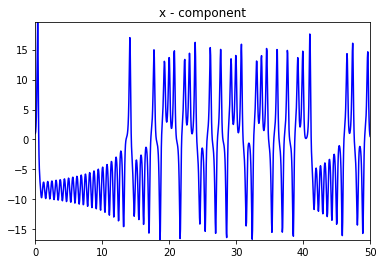

In [8]:
figx = plt.figure()
axi = figx.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 0]), jnp.max(sol.ys[:,0])))
plt.plot(sol.ts, sol.ys[:, 0], 'b')
plt.title('x - component')
plt.show()

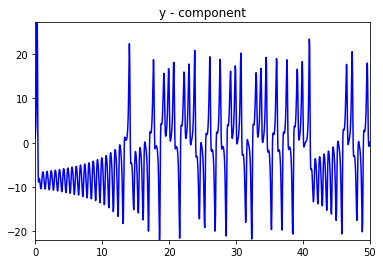

In [9]:
figy = plt.figure()
axi = figy.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 1]), jnp.max(sol.ys[:, 1])))
plt.plot(sol.ts, sol.ys[:, 1], 'b')
plt.title('y - component')
plt.show()

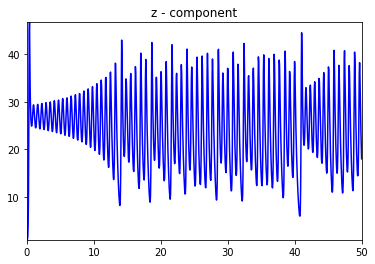

In [10]:
figz = plt.figure()
axi = figz.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 2]), jnp.max(sol.ys[:,2])))
plt.plot(sol.ts, sol.ys[:, 2], 'b')
plt.title('z - component')
plt.show()

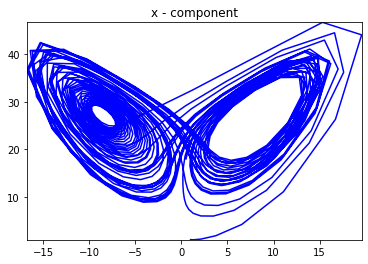

In [11]:
figxz = plt.figure()
axi = figxz.add_subplot(111,
                xlim=(jnp.min(sol.ys[:, 0]), jnp.max(sol.ys[:,0])),
                ylim=(jnp.min(sol.ys[:, 2]), jnp.max(sol.ys[:,2])))
plt.plot(sol.ys[:, 0], sol.ys[:, 2], 'b')
plt.title('x - component')
plt.show()